In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fc = pd.read_csv('D:\\Datasets\\FuelConsumptionCo2.csv')
fc.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
fc.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [4]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [5]:
fc.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [6]:
fc = fc.loc[:,['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
fc.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [7]:
fc.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDB4141CC0>,
      dtype=object)

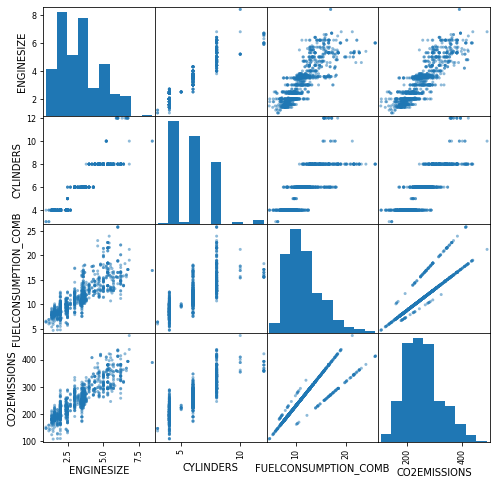

In [8]:
pd.plotting.scatter_matrix(fc, figsize=(8,8))

# Linear regression

In [9]:
fuel_con =np.asanyarray(fc['ENGINESIZE']).reshape(-1,1)
co2 = np.array(fc['CO2EMISSIONS'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
train_x, test_x, train_y, test_y = train_test_split(fuel_con, co2, test_size = 0.2)

In [12]:
lr = LinearRegression()
fit = lr.fit(train_x, train_y)

In [13]:
fit.coef_ 

array([38.66279338])

In [14]:
fit.intercept_

126.48340800899507

In [15]:
y_pred = lr.predict(test_x)

In [16]:
y_pred[10:20]

array([180.61131874, 265.66946417, 223.14039145, 254.07062615,
       203.80899476, 188.34387741, 180.61131874, 242.47178814,
       196.07643609, 203.80899476])

In [17]:
test_y[10:20]

array([177, 260, 175, 262, 184, 191, 124, 285, 207, 170], dtype=int64)

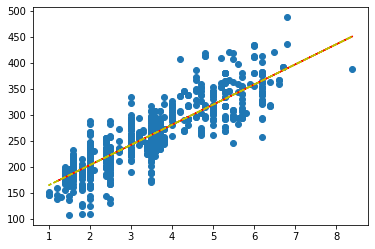

In [18]:
plt.scatter(train_x, train_y)
plt.plot(test_x, y_pred, color = 'Red', )
plt.plot(train_x, lr.predict(train_x), 'y--')

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [20]:
error = mean_absolute_error(test_y, y_pred)
error

22.783649767830926

In [21]:
r2  = r2_score(test_y, y_pred)
r2

0.7899841582278806

# M.L.R

## seprating independent variables and dependent variable

In [22]:
real_x = fc.iloc[:, 0:3]
real_x

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
5,3.5,6,10.0
6,3.5,6,10.1
7,3.7,6,11.1
8,3.7,6,11.6
9,2.4,4,9.2


In [23]:
real_y = fc.iloc[:, [3]]
real_y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
5,230
6,232
7,255
8,267
9,212


## convert the seprated datafrmaes  into array

In [24]:
real_x = np.asanyarray(real_x)
real_x    

array([[ 2. ,  4. ,  8.5],
       [ 2.4,  4. ,  9.6],
       [ 1.5,  4. ,  5.9],
       ...,
       [ 3. ,  6. , 11.8],
       [ 3.2,  6. , 11.3],
       [ 3.2,  6. , 12.8]])

In [25]:
real_y = np.asanyarray(real_y)
real_y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

## split data into training an dtesting data for fitting the model 

In [26]:
train_real_x, test_real_x, train_real_y, test_real_y = train_test_split(real_x, real_y, test_size= 0.2)

In [27]:
mlr = lr.fit(train_real_x, train_real_y)

In [28]:
mlr.coef_[0]

array([10.51444888,  7.31595325,  9.87396057])

In [29]:
mlr.intercept_

array([64.68596897])

In [30]:
test_y_pred = mlr.predict(test_real_x)

In [31]:
test_y_pred[10:15]

array([[199.63854529],
       [300.06964488],
       [270.30655336],
       [334.53779445],
       [213.71828541]])

In [32]:
test_real_y[10:15]

array([[207],
       [294],
       [271],
       [340],
       [230]], dtype=int64)

## plot 

[[ 2.   4.   8.5]
 [ 2.4  4.   9.6]
 [ 1.5  4.   5.9]
 ...
 [ 3.   6.  11.8]
 [ 3.2  6.  11.3]
 [ 3.2  6.  12.8]]


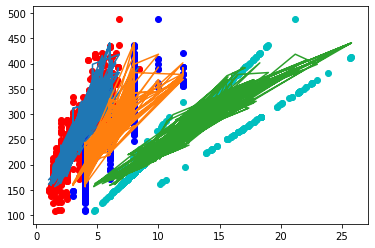

In [33]:
# plt.figure(figsize= (12,6))

# plt.subplot(131)
plt.scatter(real_x[:,0], real_y, color = 'red')
plt.scatter(real_x[:,1], real_y, color = 'blue')
plt.scatter(real_x[:,2], real_y, color= 'c')

plt.plot(real_x, ((mlr.coef_[0][0]*real_x[:,0])+(mlr.coef_[0][1]*real_x[:,1])+(mlr.coef_[0][2]*real_x[:,2])+mlr.intercept_) )

print(real_x)

In [34]:
error = mean_absolute_error(test_real_y, test_y_pred)
error

17.787516087731657

In [35]:
r2 = r2_score(test_real_y, test_y_pred)
r2 

0.8699852823437902

# polynomial regression

In [37]:
x  = fc['ENGINESIZE'].values.reshape(-1,1)
y = fc['CO2EMISSIONS'].values

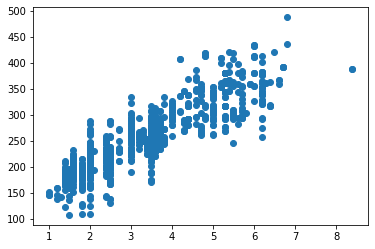

In [39]:
plt.scatter(x, y)

In [40]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.8)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly = PolynomialFeatures(degree=3)

In [53]:
# poly_train_x = poly.fit(train_x)

In [54]:
# poly_train_x = poly.transform(train_x)

In [55]:
# poly_train_x

array([[  1.   ,   6.   ,  36.   , 216.   ],
       [  1.   ,   4.   ,  16.   ,  64.   ],
       [  1.   ,   1.5  ,   2.25 ,   3.375],
       ...,
       [  1.   ,   6.2  ,  38.44 , 238.328],
       [  1.   ,   1.5  ,   2.25 ,   3.375],
       [  1.   ,   3.6  ,  12.96 ,  46.656]])

In [49]:
poly_train_x = ploy.fit_transform(train_x)

array([[  1.   ,   6.   ,  36.   , 216.   ],
       [  1.   ,   4.   ,  16.   ,  64.   ],
       [  1.   ,   1.5  ,   2.25 ,   3.375],
       ...,
       [  1.   ,   6.2  ,  38.44 , 238.328],
       [  1.   ,   1.5  ,   2.25 ,   3.375],
       [  1.   ,   3.6  ,  12.96 ,  46.656]])

In [56]:
plr = LinearRegression()

In [58]:
lr.fit(poly_train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
lr.coef_

array([ 0.        , 28.4406781 ,  4.45052457, -0.47673922])

In [60]:
lr.intercept_

130.62815224781798

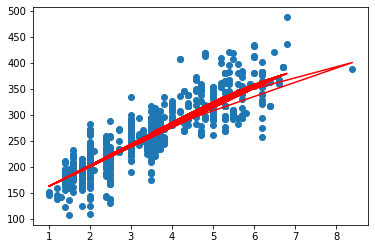

In [77]:
plt.scatter(train_x, train_y)
plt.plot(train_x, lr.predict(ploy.fit_transform(train_x)), color = 'r')

In [66]:
y_prediction = lr.predict(ploy.fit_transform(test_x))

In [67]:
y_prediction[5:10]

array([293.2655984 , 185.57385626, 201.49769297, 335.40347657,
       201.49769297])

In [68]:
test_y[5:10]

array([336, 207, 165, 344, 179], dtype=int64)

In [72]:
r2_score(test_y, y_prediction)

0.734810694193903

In [73]:
lr.score(poly_train_x, train_y)

0.7755822176721039